# **CENTRALITY MEASUREMENT**


Implement Closeness Centrality in Python.





> **Input:** adjacency matrix


> **Output:** a list or vector of centrality values







Import Library


In [55]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**Creating Graph**

Input: adjacency matrix


In [56]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
              [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
mat_size = len(A)
print("Graph of Size", mat_size,":")
print(A)

Graph of Size 9 :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


**Initializing Graphs and Matrices:**

In [57]:
# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_matrix(A)

# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Calculate Step Matrix for A[pow_size]:**

In [58]:
# Calculate the steps in between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


**=== CLOSENESS CENTRALITY ===**

In [59]:
# to perform Summation of any Row:
def sum_of_row(graph, a):
    degSum = 0
    # Summing all columns in the row
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum

def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    
    # dividing the (n-1) nodes with the sum of the closeness_values 
    result = ((mat_size-1)/closeSum)
    
    # We return a single number.
    return result

**CALCULATE CLOSENESS CENTRALITY**

In [60]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Closeness Centralities of the Graph: \n", closenessCentralityValues)

Closeness Centralities of the Graph: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]


**CONVERT USING NETWORKX**

Calculate Closeness Centrality using NetworkX.

We want to compare the result with and without Networkx Library.

In [61]:
# Converting the graph to a NetworkX Graph:
H = nx.from_numpy_matrix(A)

In [62]:
print("----------------------------------------------------------------------------------")
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Calculated Closeness Centralities: \n", closenessCentralityValues)
print("\nNetworkX Closeness Centralities: \n", nx.closeness_centrality(temp_Graph))


----------------------------------------------------------------------------------
Calculated Closeness Centralities: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]

NetworkX Closeness Centralities: 
 {0: 0.47058823529411764, 1: 0.34782608695652173, 2: 0.47058823529411764, 3: 0.6153846153846154, 4: 0.6153846153846154, 5: 0.6153846153846154, 6: 0.5, 7: 0.47058823529411764, 8: 0.34782608695652173}


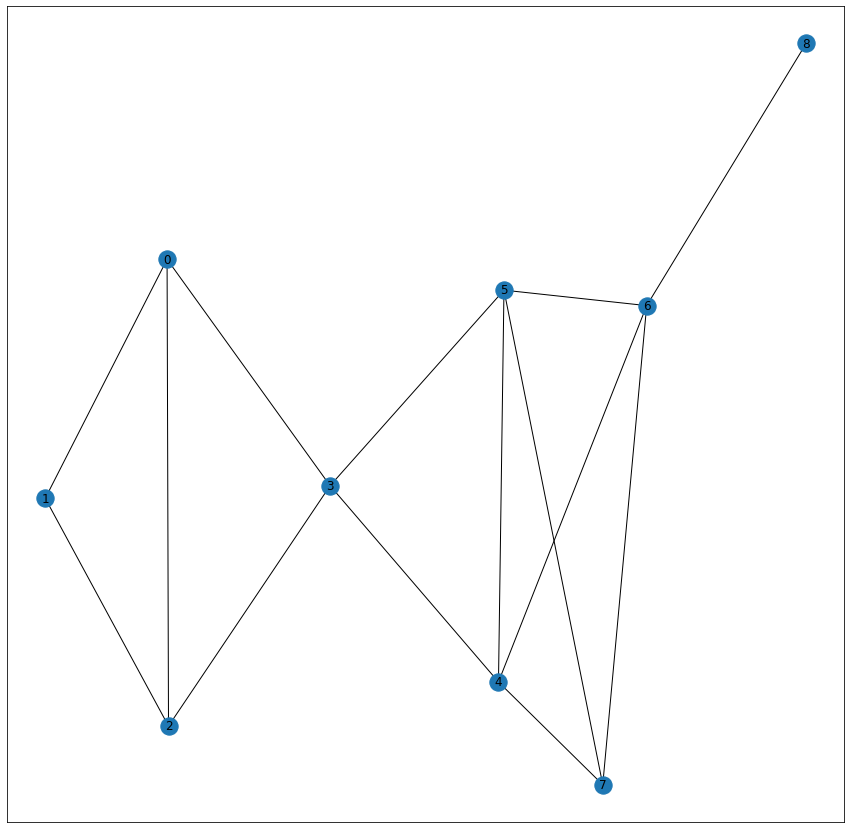

In [54]:
plt.figure(figsize =(15, 15)) 
nx.draw_networkx(temp_Graph, with_labels = True) 